In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import models, optimizers
from tensorflow.keras.layers import Dense, Embedding, LSTM, GRU,Bidirectional ,Dropout,TimeDistributed
from tensorflow.keras.models import load_model

# load dataframe

In [2]:
df = pd.read_csv('data/ner.csv', sep=",", encoding = "ISO-8859-1",error_bad_lines=False)
print(df.info())

C:\Users\ahmed\AppData\Local\Temp\ipykernel_12196\3449942017.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('data/ner.csv', sep=",", encoding = "ISO-8859-1",error_bad_lines=False)
b'Skipping line 281837: expected 25 fields, saw 34\n'


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050795 entries, 0 to 1050794
Data columns (total 25 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1050795 non-null  int64  
 1   lemma            1050795 non-null  object 
 2   next-lemma       1050795 non-null  object 
 3   next-next-lemma  1050795 non-null  object 
 4   next-next-pos    1050795 non-null  object 
 5   next-next-shape  1050795 non-null  object 
 6   next-next-word   1050795 non-null  object 
 7   next-pos         1050795 non-null  object 
 8   next-shape       1050794 non-null  object 
 9   next-word        1050794 non-null  object 
 10  pos              1050794 non-null  object 
 11  prev-iob         1050794 non-null  object 
 12  prev-lemma       1050794 non-null  object 
 13  prev-pos         1050794 non-null  object 
 14  prev-prev-iob    1050794 non-null  object 
 15  prev-prev-lemma  1050794 non-null  object 
 16  prev-prev-pos    1

# EDA

In [3]:
df.head(50)

,Unnamed: 0,lemma,next-lemma,next-next-lemma,next-next-pos,next-next-shape,next-next-word,next-pos,next-shape,next-word,...,prev-prev-lemma,prev-prev-pos,prev-prev-shape,prev-prev-word,prev-shape,prev-word,sentence_idx,shape,word,tag
0,0,thousand,of,demonstr,NNS,lowercase,demonstrators,IN,lowercase,of,...,__start2__,__START2__,wildcard,__START2__,wildcard,__START1__,1.0,capitalized,Thousands,O
1,1,of,demonstr,have,VBP,lowercase,have,NNS,lowercase,demonstrators,...,__start1__,__START1__,wildcard,__START1__,capitalized,Thousands,1.0,lowercase,of,O
2,2,demonstr,have,march,VBN,lowercase,marched,VBP,lowercase,have,...,thousand,NNS,capitalized,Thousands,lowercase,of,1.0,lowercase,demonstrators,O
3,3,have,march,through,IN,lowercase,through,VBN,lowercase,marched,...,of,IN,lowercase,of,lowercase,demonstrators,1.0,lowercase,have,O
4,4,march,through,london,NNP,capitalized,London,IN,lowercase,through,...,demonstr,NNS,lowercase,demonstrators,lowercase,have,1.0,lowercase,marched,O
5,5,through,london,to,TO,lowercase,to,NNP,capitalized,London,...,have,VBP,lowercase,have,lowercase,marched,1.0,lowercase,through,O
6,6,london,to,protest,VB,lowercase,protest,TO,lowercase,to,...,march,VBN,lowercase,marched,lowercase,through,1.0,capitalized,London,B-geo
7,7,to,protest,the,DT,lowercase,the,VB,lowercase,protest,...,through,IN,lowercase,through,capitalized,London,1.0,lowercase,to,O
8,8,protest,the,war,NN,lowercase,war,DT,lowercase,the,...,london,NNP,capitalized,London,lowercase,to,1.0,lowercase,protest,O
9,9,the,war,in,IN,lowercase,in,NN,lowercase,war,...,to,TO,lowercase,to,lowercase,protest,1.0,lowercase,the,O


In [4]:
df.iloc[0]

Unnamed: 0                     0
lemma                   thousand
next-lemma                    of
next-next-lemma         demonstr
next-next-pos                NNS
next-next-shape        lowercase
next-next-word     demonstrators
next-pos                      IN
next-shape             lowercase
next-word                     of
pos                          NNS
prev-iob              __START1__
prev-lemma            __start1__
prev-pos              __START1__
prev-prev-iob         __START2__
prev-prev-lemma       __start2__
prev-prev-pos         __START2__
prev-prev-shape         wildcard
prev-prev-word        __START2__
prev-shape              wildcard
prev-word             __START1__
sentence_idx                 1.0
shape                capitalized
word                   Thousands
tag                            O
Name: 0, dtype: object

In [5]:
#check nulls
df.isnull().sum()

Unnamed: 0         0
lemma              0
next-lemma         0
next-next-lemma    0
next-next-pos      0
next-next-shape    0
next-next-word     0
next-pos           0
next-shape         1
next-word          1
pos                1
prev-iob           1
prev-lemma         1
prev-pos           1
prev-prev-iob      1
prev-prev-lemma    1
prev-prev-pos      1
prev-prev-shape    1
prev-prev-word     1
prev-shape         1
prev-word          1
sentence_idx       1
shape              1
word               1
tag                1
dtype: int64

In [6]:
df.iloc[407590:407600]

,Unnamed: 0,lemma,next-lemma,next-next-lemma,next-next-pos,next-next-shape,next-next-word,next-pos,next-shape,next-word,...,prev-prev-lemma,prev-prev-pos,prev-prev-shape,prev-prev-word,prev-shape,prev-word,sentence_idx,shape,word,tag
407590,125755,reject,the,find,NNS,lowercase,findings,DT,lowercase,the,...,paul,NNP,capitalized,Paul,capitalized,Bremer,5736.0,lowercase,rejected,O
407591,125756,the,find,",",",",punct,",",NNS,lowercase,findings,...,bremer,NNP,capitalized,Bremer,lowercase,rejected,5736.0,lowercase,the,O
407592,125757,find,",",say,VBG,lowercase,saying,",",punct,",",...,reject,VBD,lowercase,rejected,lowercase,the,5736.0,lowercase,findings,O
407593,125758,",",say,the,DT,lowercase,the,VBG,lowercase,saying,...,the,DT,lowercase,the,lowercase,findings,5736.0,punct,",",O
407594,125759,say,the,report,NN,lowercase,report,DT,lowercase,the,...,find,NNS,lowercase,findings,punct,",",5736.0,lowercase,saying,O
407595,125760,the,report,assum,VBZ,lowercase,assumes,NN,lowercase,report,...,",",",",punct,",",lowercase,saying,5736.0,lowercase,the,O
407596,125761,report,assum,western-styl,JJ,contains-hyphen,western-style,VBZ,lowercase,assumes,...,say,VBG,lowercase,saying,lowercase,the,5736.0,lowercase,report,O
407597,125762,assum,western-styl,account,NN,lowercase,accounting,JJ,contains-hyphen,western-style,...,the,DT,lowercase,the,lowercase,report,5736.0,lowercase,assumes,O
407598,125763,western-styl,account,procedur,NNS,lowercase,procedures,NN,lowercase,accounting,...,report,NN,lowercase,report,lowercase,assumes,5736.0,contains-hyphen,western-style,O
407599,125764,account,procedur,could,MD,lowercase,could,NNS,lowercase,procedures,...,assum,VBZ,lowercase,assumes,contains-hyphen,western-style,5736.0,lowercase,accounting,O


In [7]:
df.dropna(inplace=True)

data length :1050794
number of dublicated data : 281835


<BarContainer object of 2 artists>

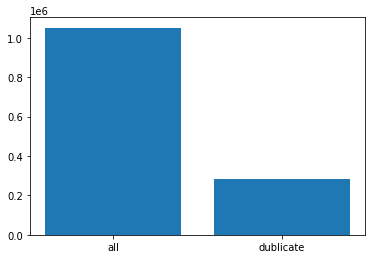

In [8]:
#check dublicated data : 
print(f'data length :{df.shape[0]}')
print(f'number of dublicated data : {df.duplicated().sum()}')
plt.bar(['all','dublicate'],[df.shape[0],df.duplicated().sum()])

### drop dublicate data

In [9]:

df.drop_duplicates(inplace=True)

### continue EDA

<AxesSubplot:>

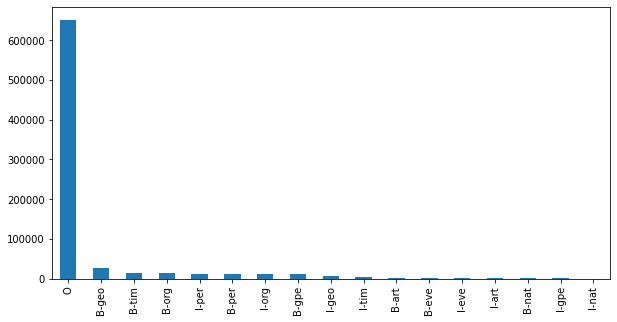

In [10]:
#it will not make a bias as we used model base on sequence like rnn
df['tag'].value_counts().plot(kind='bar',figsize=(10,5)) 

<AxesSubplot:>

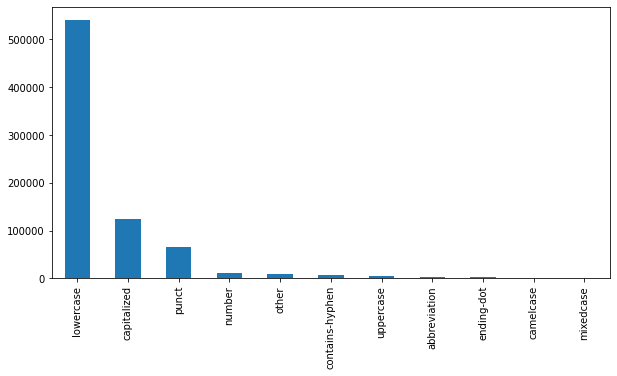

In [11]:
df['shape'].value_counts().plot(kind='bar',figsize=(10,5)) 

<AxesSubplot:>

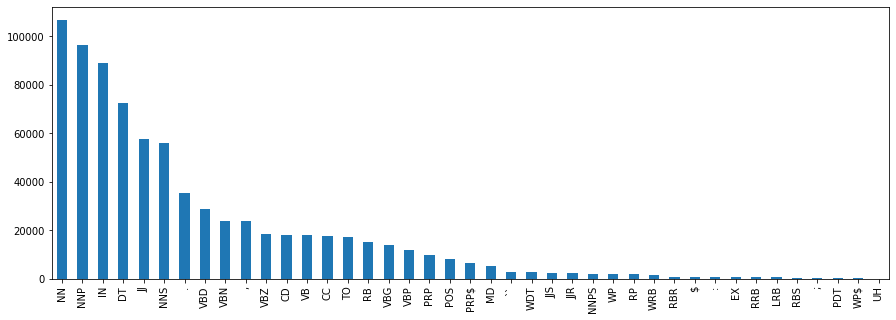

In [12]:
df['pos'].value_counts().plot(kind='bar',figsize=(15,5)) 

(array([1.1160e+03, 8.1600e+03, 1.3432e+04, 9.2280e+03, 2.6860e+03,
        4.4800e+02, 8.6000e+01, 1.4000e+01, 5.0000e+00, 2.0000e+00]),
 array([ 1.,  9., 17., 25., 33., 41., 49., 57., 65., 73., 81.]),
 <BarContainer object of 10 artists>)

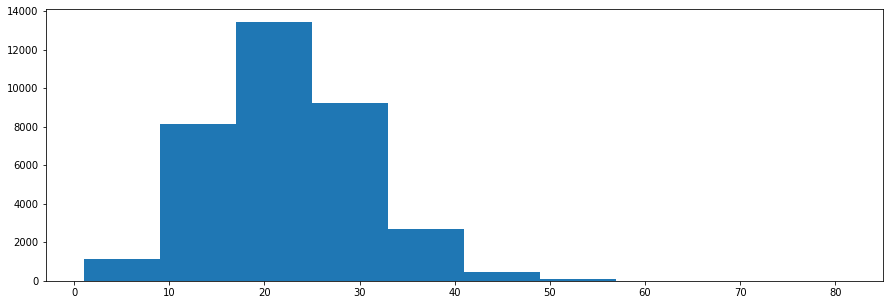

In [13]:
plt.figure(figsize=(15,5))
plt.hist(df.groupby(['sentence_idx']).count()['word'],bins=10)

## Preprosessing

In [14]:
#selected columns 
selected_columns=['word','tag' ,'sentence_idx','pos']

In [15]:
df = df.drop(columns=df.columns[(np.in1d(np.array(df.columns), np.array(selected_columns))) == False])

In [16]:
df

,pos,sentence_idx,word,tag
0,NNS,1.0,Thousands,O
1,IN,1.0,of,O
2,NNS,1.0,demonstrators,O
3,VBP,1.0,have,O
4,VBN,1.0,marched,O
...,...,...,...,...
1050790,PRP,47959.0,they,O
1050791,VBD,47959.0,responded,O
1050792,TO,47959.0,to,O
1050793,DT,47959.0,the,O


In [17]:
sen_group = df.groupby(['sentence_idx']).count()

In [18]:
# def aggfunc(rows):
#     return rows[['word','tag','pos']].values.tolist()

    
# all_sentense = df.groupby(['sentence_idx']).apply(aggfunc).values

all_sentense = df.groupby(['sentence_idx']).apply(lambda x: [x['word'].tolist(),x['tag'].tolist(),x['pos'].tolist()]).values.tolist()

In [19]:
len(all_sentense)

35177

In [20]:
all_sentense[0][:]

[['Thousands',
  'of',
  'demonstrators',
  'have',
  'marched',
  'through',
  'London',
  'to',
  'protest',
  'the',
  'war',
  'in',
  'Iraq',
  'and',
  'demand',
  'the',
  'withdrawal',
  'of',
  'British',
  'troops',
  'from',
  'that',
  'country',
  '.'],
 ['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-geo',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-geo',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-gpe',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['NNS',
  'IN',
  'NNS',
  'VBP',
  'VBN',
  'IN',
  'NNP',
  'TO',
  'VB',
  'DT',
  'NN',
  'IN',
  'NNP',
  'CC',
  'VB',
  'DT',
  'NN',
  'IN',
  'JJ',
  'NNS',
  'IN',
  'DT',
  'NN',
  '.']]

In [21]:
all_sentense_words = [sen[0] for sen in all_sentense ]
all_sentense_tags = [sen[1] for sen in all_sentense ]
all_sentense_pos = [sen[2] for sen in all_sentense ]

In [22]:
print(f'number of words : {len(df["word"].value_counts())} word')
print(f'number of tags : {len(df["tag"].value_counts())} word')

number of words : 30172 word
number of tags : 17 word


In [23]:
sep=' '
text = sep.join(df["word"].tolist())
text_tags = sep.join(df["tag"].tolist())

In [24]:
VOC_SIZE = 30172
word_tokenizer = Tokenizer(num_words= VOC_SIZE,split= ' ',lower=False,filters='',)
word_tokenizer.fit_on_texts([text])

tag_tokenizer = Tokenizer(num_words= 17,split= ' ',lower=False,filters='',)
tag_tokenizer.fit_on_texts([text_tags])

In [25]:
print(len(word_tokenizer.word_index))
word_tokenizer.index_word

30172


{1: 'the',
 2: '.',
 3: ',',
 4: 'of',
 5: 'in',
 6: 'to',
 7: 'a',
 8: 'and',
 9: 'The',
 10: "'s",
 11: 'for',
 12: 'has',
 13: 'is',
 14: 'on',
 15: 'that',
 16: 'have',
 17: 'with',
 18: 'said',
 19: 'was',
 20: 'says',
 21: 'from',
 22: 'by',
 23: 'at',
 24: 'say',
 25: 'U.S.',
 26: 'as',
 27: 'an',
 28: '"',
 29: 'are',
 30: 'were',
 31: 'his',
 32: 'will',
 33: 'Mr.',
 34: 'government',
 35: 'it',
 36: 'been',
 37: 'killed',
 38: 'not',
 39: 'people',
 40: 'he',
 41: 'two',
 42: 'officials',
 43: 'its',
 44: 'after',
 45: 'President',
 46: 'be',
 47: 'A',
 48: 'also',
 49: 'more',
 50: 'United',
 51: 'military',
 52: 'country',
 53: 'who',
 54: 'than',
 55: 'they',
 56: 'Iraq',
 57: 'their',
 58: 'but',
 59: 'last',
 60: 'In',
 61: 'He',
 62: 'which',
 63: 'one',
 64: 'had',
 65: 'new',
 66: 'least',
 67: 'year',
 68: 'other',
 69: 'about',
 70: 'police',
 71: 'this',
 72: 'States',
 73: 'Tuesday',
 74: 'Iran',
 75: 'Thursday',
 76: 'forces',
 77: 'group',
 78: 'week',
 79: 'Mon

In [26]:
X_words_sequences = word_tokenizer.texts_to_sequences(all_sentense_words)
sequences_words_pad = pad_sequences(X_words_sequences, maxlen=80,padding='post')

X_tags_sequences =tag_tokenizer.texts_to_sequences(all_sentense_tags)
sequences_tags_pad = pad_sequences(X_tags_sequences, maxlen=80,padding='post')

In [27]:
sequences_words_pad

array([[1156,    4, 1133, ...,    0,    0,    0],
       [9206,    4,  135, ...,    0,    0,    0],
       [ 211, 1978,   21, ...,    0,    0,    0],
       ...,
       [ 725,   49, 3045, ...,    0,    0,    0],
       [ 211,   24,   38, ...,    0,    0,    0],
       [ 364,   76,   18, ...,    0,    0,    0]])

In [28]:
sequences_tags_pad

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [8, 1, 1, ..., 0, 0, 0]])

In [29]:
y = [to_categorical(i, num_classes=18) for i in sequences_tags_pad] #shape(sentanse,words,ntags)=(35177,80,17)

In [30]:
y[0][6]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

In [31]:
all_sentense_tags[0]

['O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-geo',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-geo',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-gpe',
 'O',
 'O',
 'O',
 'O',
 'O']

In [32]:
tag_tokenizer.index_word

{1: 'O',
 2: 'B-geo',
 3: 'B-tim',
 4: 'B-org',
 5: 'I-per',
 6: 'B-per',
 7: 'I-org',
 8: 'B-gpe',
 9: 'I-geo',
 10: 'I-tim',
 11: 'B-art',
 12: 'B-eve',
 13: 'I-eve',
 14: 'I-art',
 15: 'B-nat',
 16: 'I-gpe',
 17: 'I-nat'}

In [33]:
X_train, X_test, y_train, y_test = train_test_split(sequences_words_pad, y, test_size=0.2)

In [34]:
model = models.Sequential()
model.add(Embedding(input_dim=VOC_SIZE,output_dim=150,input_length=80)) #building vector for each word
model.add(Bidirectional(LSTM(units=100,return_sequences=True)))#output shape (batch size,seqence length ,lstm units)
model.add(TimeDistributed(Dense(18,activation='softmax'))) #timedistributed take shape(batch size,seqence length , input size) => shape(batch size,seqence length , num of classes)

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 80, 150)           4525800   
                                                                 
 bidirectional (Bidirectiona  (None, 80, 200)          200800    
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 80, 18)           3618      
 ibuted)                                                         
                                                                 
Total params: 4,730,218
Trainable params: 4,730,218
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [56]:
history = model.fit(X_train, np.array(y_train),validation_data=(X_test,y_test), batch_size=32, epochs=1, validation_split=0.2, verbose=1)

704/704 [==============================] - 11s 15ms/step - loss: 0.0336 - accuracy: 0.9904 - val_loss: 0.0353 - val_accuracy: 0.9896


In [57]:
prediction = model.predict(X_test)

In [58]:
prediction.shape

(7036, 80, 18)

In [59]:
y_predict = []
for i in range(prediction.shape[0]):
    # sen =[]
    # for j in range(prediction[i].shape[0]) :
    index = np.argmax(prediction[i],-1)
        # print(index)
        # sen.append(tag_tokenizer.index_word[index+1])
    y_predict.append(index)

In [60]:
np.array(y_predict).shape

(7036, 80)

In [61]:
np.argmax(y_test,-1).shape

(7036, 80)

In [62]:
from sklearn.metrics import accuracy_score 
print(accuracy_score(y_true=np.argmax(y_test,-1).flatten(),y_pred=np.array(y_predict).flatten()))

0.9894169272313814


In [63]:
model.save('NER_model')
model_s = load_model('NER_model')

INFO:tensorflow:Assets written to: NER_model\assets


INFO:tensorflow:Assets written to: NER_model\assets


In [64]:
def text_prediction(text):
    return tag_tokenizer.sequences_to_texts(np.argmax(model_s.predict(pad_sequences(word_tokenizer.texts_to_sequences([text]), maxlen=80,padding='post')),axis=-1))

In [71]:
text_prediction("Apple Inc")

['B-org']